In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
adjacency_matrix = [[0,1,1,0],[1,0,0,1],[1,0,0,0],[0,1,0,0]]
test_cells = {0:{'width':8,'height':8}, 1:{'width':6,'height':6},2:{'width':4,'height':4},3:{'width':2,'height':2}}
macro_indices = [0,1,2,3]
std_indices = []
# adjacency_matrix = [[0,1],[1,0]]
# test_cells = {0:{'width':8,'height':8}, 1:{'width':8,'height':8}}
# macro_indices = [0,1]
# std_indices = []

from environment.environment import CircuitEnv
env = CircuitEnv(adjacency_matrix, test_cells, macro_indices, std_indices,reward_weights=[1,0,10])

from stable_baselines3.common.env_checker import check_env
check_env(env)

c:\Users\hsjung02\AppData\Local\miniconda3\envs\capstone\lib\site-packages\stable_baselines3\common\env_checker.py:237: UserWarning: Your observation nodes has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


In [3]:
from sb3_contrib import MaskablePPO
from sb3_contrib.common.maskable.utils import get_action_masks
from model.agent import CircuitExtractor, CircuitActorCriticPolicy
policy_kwargs = dict(features_extractor_class=CircuitExtractor)
model = MaskablePPO(CircuitActorCriticPolicy, env, policy_kwargs=policy_kwargs,verbose=1)
model.policy

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


CircuitActorCriticPolicy(
  (features_extractor): CircuitExtractor(
    (metadata_encoder): Sequential(
      (0): Linear(in_features=10, out_features=8, bias=True)
      (1): ReLU()
    )
    (feature_encoder): ModuleList(
      (0-2): 3 x NodeEdge(
        (fc): Linear(in_features=8, out_features=8, bias=True)
      )
    )
    (atten_layer): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
    )
  )
  (pi_features_extractor): CircuitExtractor(
    (metadata_encoder): Sequential(
      (0): Linear(in_features=10, out_features=8, bias=True)
      (1): ReLU()
    )
    (feature_encoder): ModuleList(
      (0-2): 3 x NodeEdge(
        (fc): Linear(in_features=8, out_features=8, bias=True)
      )
    )
    (atten_layer): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
    )
  )
  (vf_features_extractor): CircuitExtractor(
    (metadata_encoder): Sequential(
    

536
873
178
721


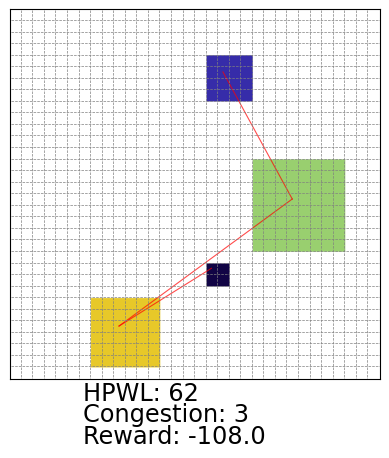

In [4]:
done = False

obs = env.reset()[0]
while not done:
    action_masks = get_action_masks(env)
    action, _states = model.predict(obs, action_masks=action_masks)
    print(action)
    obs, reward, done, truncated, info = env.step(action)

env.render()

In [5]:
model.learn(50000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 4        |
|    ep_rew_mean     | -126     |
| time/              |          |
|    fps             | 140      |
|    iterations      | 1        |
|    time_elapsed    | 14       |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 4            |
|    ep_rew_mean          | -130         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 2            |
|    time_elapsed         | 38           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 9.113806e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -6.4         |
|    explained_variance   | 0.109        |
|    learning_r

IndexError: index 31 is out of bounds for axis 1 with size 31

524
565
752
370


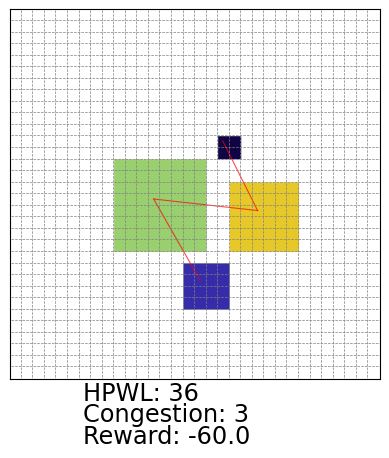

In [6]:
done = False

obs = env.reset()[0]
while not done:
    action_masks = get_action_masks(env)
    action, _states = model.predict(obs, action_masks=action_masks, deterministic=True)
    print(action)
    obs, reward, done, truncated, info = env.step(action)

env.render()